In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = 'Iris'
path = dataset+ '_results/raw_metric_data_0.25.csv'
df = pd.read_csv(path)
df

,times_onestep,times_twostep,feature_sizes_onestep,feature_sizes_twostep,rsum_onestep,rsum_twostep,coverage_onestep,coverage_twostep
0,0.024299,0.025128,3,3,1.962545,1.906982,20,29
1,0.019523,0.022668,3,3,1.998706,1.934962,1,16
2,0.016957,0.022802,3,3,1.990808,1.930578,2,24
3,0.018498,0.022910,3,3,1.948746,1.905764,16,29
4,0.017326,0.022631,3,3,1.948746,1.927274,16,25
...,...,...,...,...,...,...,...,...
108,0.014858,0.019188,2,2,2.888135,2.881619,19,27
109,0.018705,0.023132,3,3,2.836732,2.776732,58,64
110,0.014666,0.020651,2,2,2.881296,2.877876,34,35
111,0.017150,0.023359,3,3,2.723013,2.669796,63,36


In [3]:
np.median(df['coverage_onestep']),np.median(df['coverage_twostep'])

(27.0, 32.0)

In [6]:
count = (df['coverage_twostep'] > df['coverage_onestep']).sum()
total = len(df)
print(count,count/total*100)

79 69.91150442477876


In [7]:
np.mean(df['coverage_onestep']),np.mean(df['coverage_twostep'])

(30.4070796460177, 35.04424778761062)

In [8]:
np.std(df['coverage_onestep']),np.std(df['coverage_twostep'])

(19.50522379231642, 15.350990501916442)

In [62]:
#Proporção Relativa do coverage Twostep vs Onestep
relative_proportion = np.where(df['coverage_onestep'] != 0, ((df['coverage_twostep'] - df['coverage_onestep']) / df['coverage_onestep']) * 100, np.nan)
relative_proportion

array([  45.        , 1500.        , 1100.        ,   81.25      ,
         56.25      ,   21.42857143,  100.        ,   75.        ,
         40.        ,  141.66666667,  400.        ,  -25.71428571,
        100.        ,    0.        ,  400.        ,   -3.57142857,
          4.34782609,    0.        ,  141.66666667,    6.25      ,
          0.        ,  141.66666667,  460.        ,   45.        ,
         91.66666667,    4.34782609,   45.        ,   20.        ,
         -8.57142857,   20.        ,  -11.76470588,  500.        ,
         20.        ,  100.        ,   10.71428571,  383.33333333,
          4.34782609, 1350.        ,   12.96296296,   -2.17391304,
         25.92592593,   -2.17391304,   72.72727273,   47.82608696,
          0.        ,   -2.17391304,    1.66666667,   -8.16326531,
        109.09090909,   25.92592593,   92.85714286,  266.66666667,
          0.        ,  366.66666667,  180.        ,   -8.16326531,
         -6.15384615,   -9.52380952,    2.94117647,    6.66666

In [11]:
relative_mean = np.mean(np.where(df['coverage_onestep'] != 0, ((df['coverage_twostep'] - df['coverage_onestep']) / df['coverage_onestep']) * 100, np.nan))
relative_std = np.std(np.where(df['coverage_onestep'] != 0, ((df['coverage_twostep'] - df['coverage_onestep']) / df['coverage_onestep']) * 100, np.nan))
relative_mean,relative_std

(86.91977902238678, 229.80042042466272)

Proporção de instâncias que melhoram: 69.91%


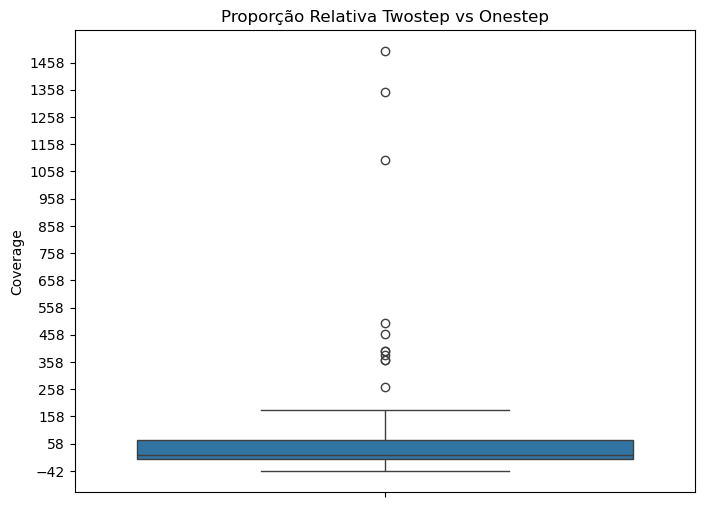

In [33]:
proportion_improvement = (df['coverage_twostep'] > df['coverage_onestep']).mean()
relative_proportion = np.where(df['coverage_onestep'] != 0, ((df['coverage_twostep'] - df['coverage_onestep']) / df['coverage_onestep']) * 100, np.nan)
print(f'Proporção de instâncias que melhoram: {proportion_improvement:.2%}')
# Criar o boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=relative_proportion)
plt.ylabel('Coverage')
plt.title('Proporção Relativa Twostep vs Onestep')
plt.yticks(np.arange(int(np.nanmin(relative_proportion)), int(np.nanmax(relative_proportion)) + 5, step=100))
plt.show()

Bin 0 (-42.86 to -13.19):
  [-25.71428571428571, -40.98360655737705, -14.0625, -40.98360655737705, -42.857142857142854]

Bin 1 (-13.19 to 16.48):
  [0.0, -3.571428571428571, 4.3478260869565215, 0.0, 6.25, 0.0, 4.3478260869565215, -8.571428571428571, -11.76470588235294, 10.714285714285714, 4.3478260869565215, 12.962962962962962, -2.1739130434782608, -2.1739130434782608, 0.0, -2.1739130434782608, 1.6666666666666667, -8.16326530612245, 0.0, -8.16326530612245, -6.153846153846154, -9.523809523809524, 2.941176470588235, 6.666666666666667, 0.0, -2.1739130434782608, -10.204081632653061, -2.1739130434782608, -2.1739130434782608, -8.16326530612245, 1.639344262295082, 2.941176470588235, 10.344827586206897, -2.1739130434782608, 0.0, 16.363636363636363, 16.363636363636363, -2.1739130434782608, 6.666666666666667, 2.941176470588235, 0.0, -1.6129032258064515, 2.941176470588235, 2.941176470588235, 3.225806451612903, -9.230769230769232, 2.941176470588235, 0.0, 3.225806451612903, 0.0, 10.344827586206897,

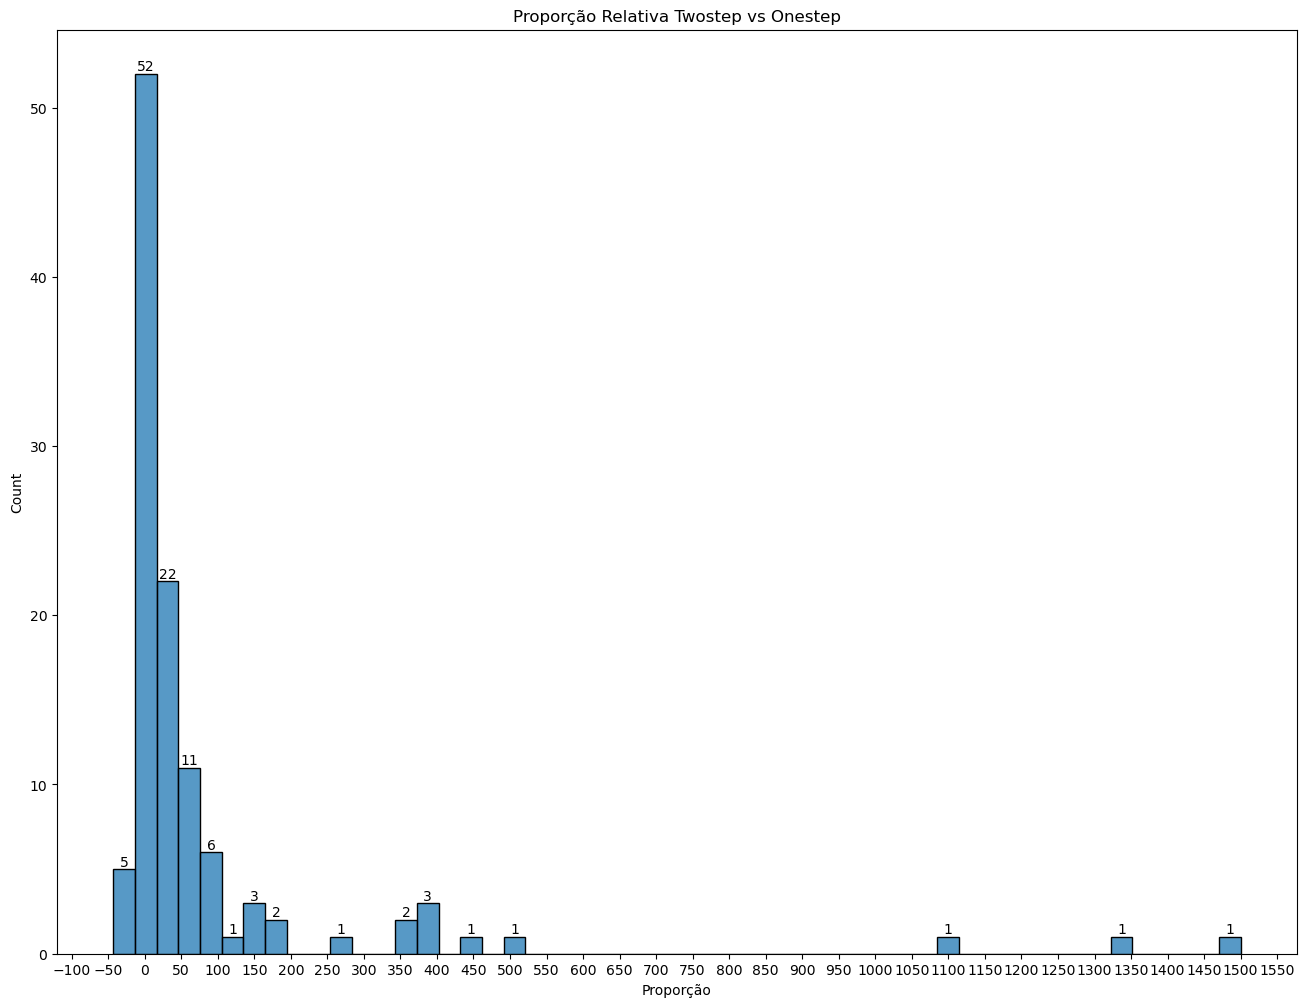

In [48]:
plt.figure(figsize=(16, 12))
ax = sns.histplot(data=relative_proportion)
# Get the bin edges
bin_edges = ax.patches[0].get_x() + ax.patches[0].get_width() * np.arange(len(ax.patches) + 1)

# For each bin, get the elements that fall into it
bin_contents = {i: [] for i in range(len(bin_edges) - 1)}

for i, value in enumerate(relative_proportion):
    for j in range(len(bin_edges) - 1):
        if bin_edges[j] <= value < bin_edges[j + 1]:
            bin_contents[j].append(value)

# Display the bin contents (data points in each bin)
for bin_num, elements in bin_contents.items():
    print(f"Bin {bin_num} ({bin_edges[bin_num]:.2f} to {bin_edges[bin_num + 1]:.2f}):")
    print(f"  {elements}")
    print()
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only label non-empty bins
        plt.text(patch.get_x() + patch.get_width() / 2, 
                 height, 
                 f'{int(height)}',  # Convert to int for cleaner display
                 ha='center', va='bottom', fontsize=10)

plt.ylabel('Count')
plt.xlabel('Proporção')
plt.title('Proporção Relativa Twostep vs Onestep')
plt.xticks(np.arange(-100, 1600, step=50))
plt.show()

In [50]:
bin_list = [0.0, -3.571428571428571, 4.3478260869565215, 0.0, 6.25, 0.0, 4.3478260869565215, -8.571428571428571, -11.76470588235294, 10.714285714285714, 4.3478260869565215, 12.962962962962962, -2.1739130434782608, -2.1739130434782608, 0.0, -2.1739130434782608, 1.6666666666666667, -8.16326530612245, 0.0, -8.16326530612245, -6.153846153846154, -9.523809523809524, 2.941176470588235, 6.666666666666667, 0.0, -2.1739130434782608, -10.204081632653061, -2.1739130434782608, -2.1739130434782608, -8.16326530612245, 1.639344262295082, 2.941176470588235, 10.344827586206897, -2.1739130434782608, 0.0, 16.363636363636363, 16.363636363636363, -2.1739130434782608, 6.666666666666667, 2.941176470588235, 0.0, -1.6129032258064515, 2.941176470588235, 2.941176470588235, 3.225806451612903, -9.230769230769232, 2.941176470588235, 0.0, 3.225806451612903, 0.0, 10.344827586206897, 2.941176470588235]
count_below_zero = len([x for x in bin_list if x < 0])
count_below_zero, len(bin_list)

(19, 52)

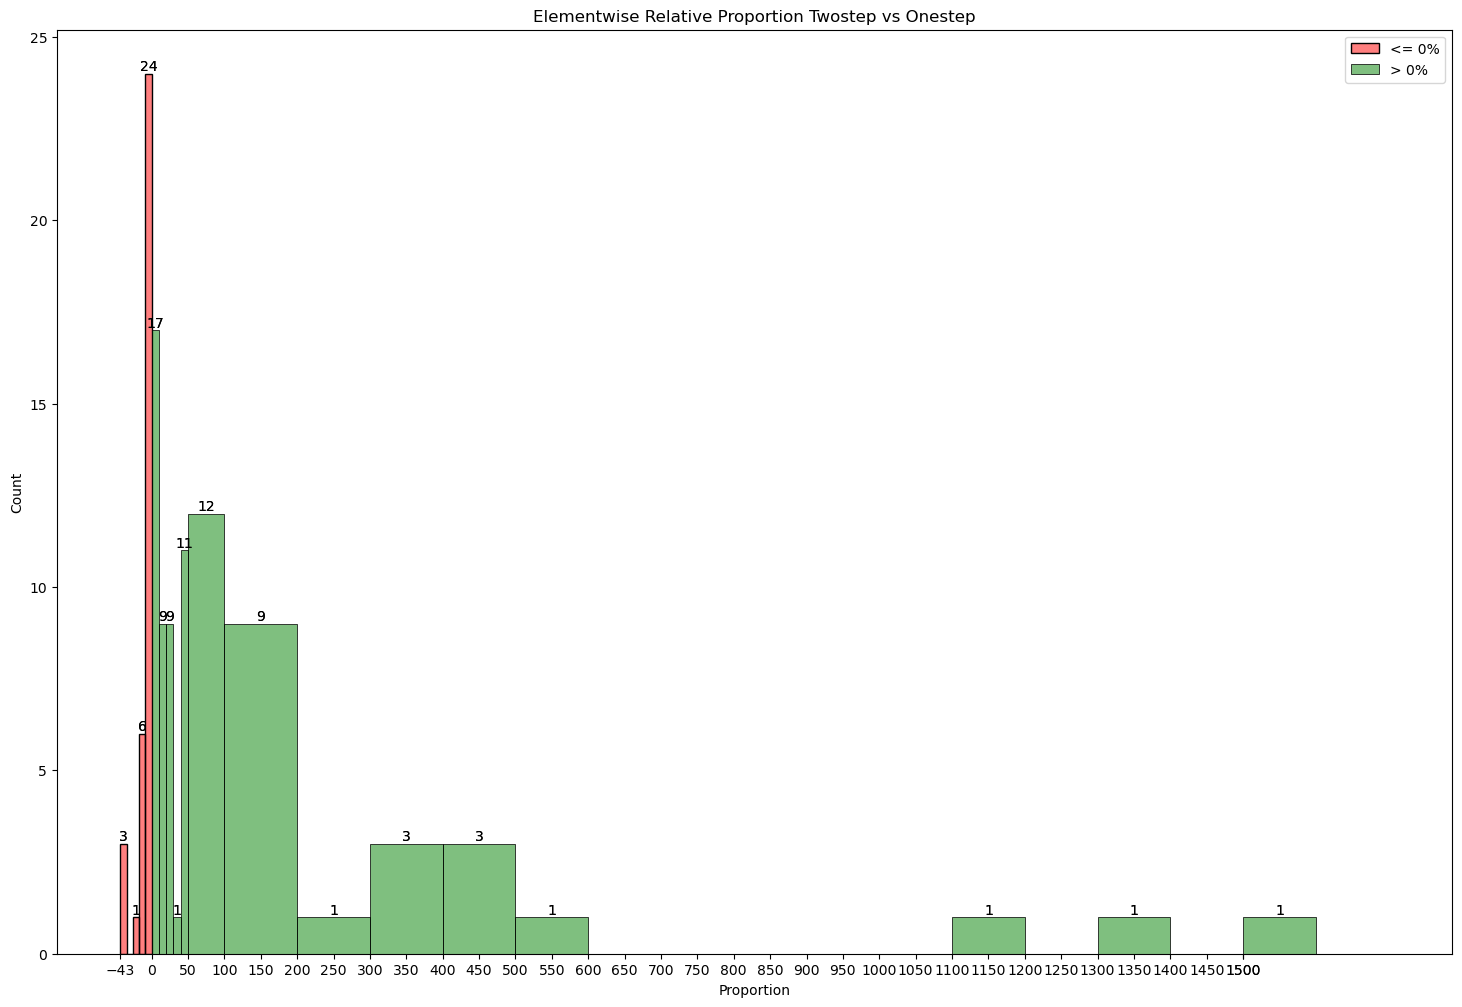

In [120]:
values_up_to_zero = relative_proportion[relative_proportion <= 0]
values_above_zero = relative_proportion[relative_proportion > 0]

# Create the plot
plt.figure(figsize=(18, 12))

# Plot for values <= 0 (red)
# Here, the bins are dynamic based on the range of the data
ax1 = sns.histplot(values_up_to_zero, bins=5, kde=False, color='red', label='<= 0%', alpha=0.5)

# Plot for values > 0 (green) with more granular first bin
# Here, custom bin edges are specified
ax2 = sns.histplot(values_above_zero, bins=[0, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700], kde=False, color='green', label='> 0%', alpha=0.5)

# Add title and labels
plt.title('Elementwise Relative Proportion Twostep vs Onestep')
plt.xlabel('Proportion')
plt.ylabel('Count')

# Add legend
plt.legend()

# Add count labels on top of the bars
for ax in [ax1, ax2]:
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # Only label non-empty bins
            plt.text(patch.get_x() + patch.get_width() / 2, 
                     height, 
                     f'{int(height)}',  # Convert to int for cleaner display
                     ha='center', va='bottom', fontsize=10)

# Get min and max values for the x-axis based on the relative_proportion data
min_value = np.min(relative_proportion)
max_value = np.max(relative_proportion)

# Set x-ticks for the second histogram with a step of 50
# Combine the ticks for both histograms (step 10 for <= 0 and step 50 for > 0)
ticks = np.concatenate([np.array([min_value, max_value]), 
                       np.arange(0, np.ceil(max_value) + 50, step=50)])

# Set the combined ticks for the x-axis
plt.xticks(ticks, fontsize=10)

# Show the plot
plt.show()

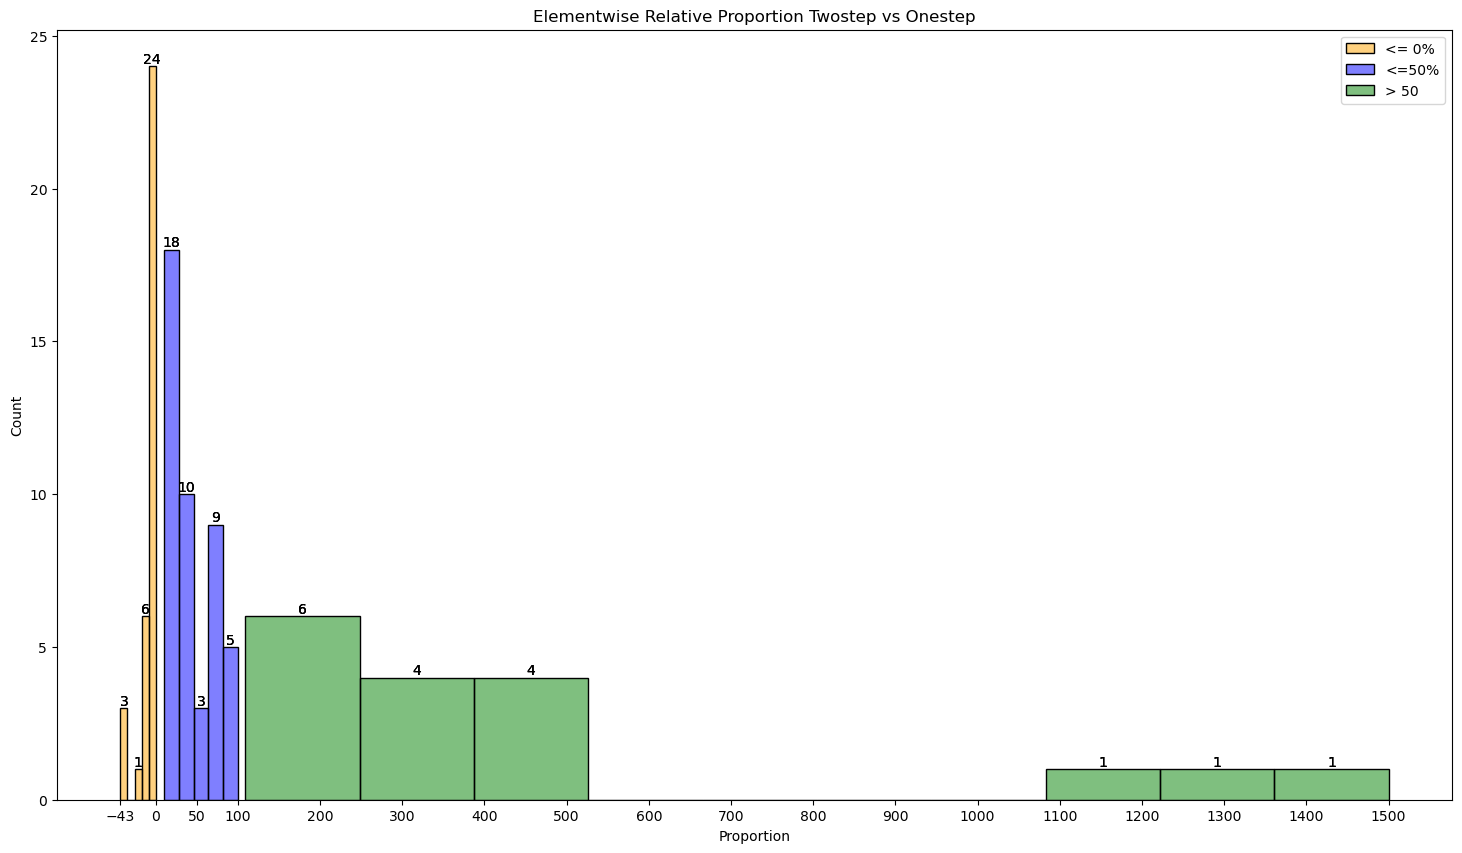

In [159]:
values_up_to_zero = relative_proportion[relative_proportion <= 0]
values_0_to_100 = relative_proportion[(relative_proportion > 10) & (relative_proportion <= 100)]
values_above_100 = relative_proportion[relative_proportion > 100]

# Create the plot
plt.figure(figsize=(18, 10))

# Plot for values <= 0 (red)
ax1 = sns.histplot(values_up_to_zero, bins=5, kde=False, color='orange', label='<= 0%', alpha=0.5)

# Plot for values > 0 but <= 50 (orange)
ax2 = sns.histplot(values_0_to_100, bins=5, kde=False, color='blue', label='<=50%', alpha=0.5)

# Plot for values > 50 (green)
ax3 = sns.histplot(values_above_100, bins=10, kde=False, color='green', label='> 50', alpha=0.5)

# Add title and labels
plt.title('Elementwise Relative Proportion Twostep vs Onestep')
plt.xlabel('Proportion')
plt.ylabel('Count')

# Add legend
plt.legend()

# Add count labels on top of the bars
for ax in [ax1, ax2, ax3]:
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # Only label non-empty bins
            plt.text(patch.get_x() + patch.get_width() / 2, 
                     height, 
                     f'{int(height)}',  # Convert to int for cleaner display
                     ha='center', va='bottom', fontsize=10)

# Get min and max values for the x-axis based on the relative_proportion data
min_value = np.min(relative_proportion)
max_value = np.max(relative_proportion)

# Generate the x-ticks dynamically
ticks = np.concatenate([
    np.array([np.min(values_up_to_zero), 0,50]),   # Ticks for values <= 0
    np.arange(100, np.ceil(max_value) + 50, step=100)  # Ticks for values > 50
])

# Set the combined ticks for the x-axis
plt.xticks(ticks, fontsize=10)

# Show the plot
plt.show()

In [153]:
len(values_up_to_zero), len(values_0_to_100)+ len(values_above_100)

(34, 62)

In [156]:
len(values_up_to_zero)/(len(values_0_to_100)+ len(values_above_100))

0.5483870967741935